Importing necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


Loading and preprocessing the dataset

In [2]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (classes)

# One-Hot Encoding for multi-class labels
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))  # Transform to one-hot encoding

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

Data scaling (Normalization)

In [3]:

scaler = StandardScaler()  # Standardization of feature values
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building the Neural Network model

In [4]:
model = Sequential()

# Using Input layer as the first layer with the input shape
model.add(Input(shape=(X_train_scaled.shape[1],)))

# First Hidden Layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Adding a Dropout Layer to prevent overfitting
model.add(Dropout(0.2))

# Second Hidden Layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Adding another Dropout Layer
model.add(Dropout(0.2))

# Output Layer with Softmax Activation (3 neurons for 3 classes)
model.add(Dense(3, activation='softmax'))


Compiling the model

In [5]:
# Using categorical_crossentropy because it is a multi-class classification problem
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the model

In [6]:
# Train the model for 100 epochs, using a batch size of 10, and include validation data (test set)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_test_scaled, y_test))

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4945 - loss: 1.0016 - val_accuracy: 0.7111 - val_loss: 0.8476
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6148 - loss: 0.8539 - val_accuracy: 0.7111 - val_loss: 0.7031
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6607 - loss: 0.7352 - val_accuracy: 0.7111 - val_loss: 0.6037
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7059 - loss: 0.6821 - val_accuracy: 0.7778 - val_loss: 0.5286
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7525 - loss: 0.6001 - val_accuracy: 0.7778 - val_loss: 0.4770
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 0.5599 - val_accuracy: 0.7778 - val_loss: 0.4419
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7773 - loss: 0.5537 - val_accuracy: 0.7778 - val_loss: 0.4142
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7976 - loss: 0.4738 - val_accuracy: 0.8000

Evaluating the model performance

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0119 
Test Accuracy: 100.00%


Model predictions and performance metrics

In [8]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)  # Convert predictions from one-hot encoding to class labels
y_true = np.argmax(y_test, axis=1)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=iris.target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Plotting training history (Accuracy and Loss)

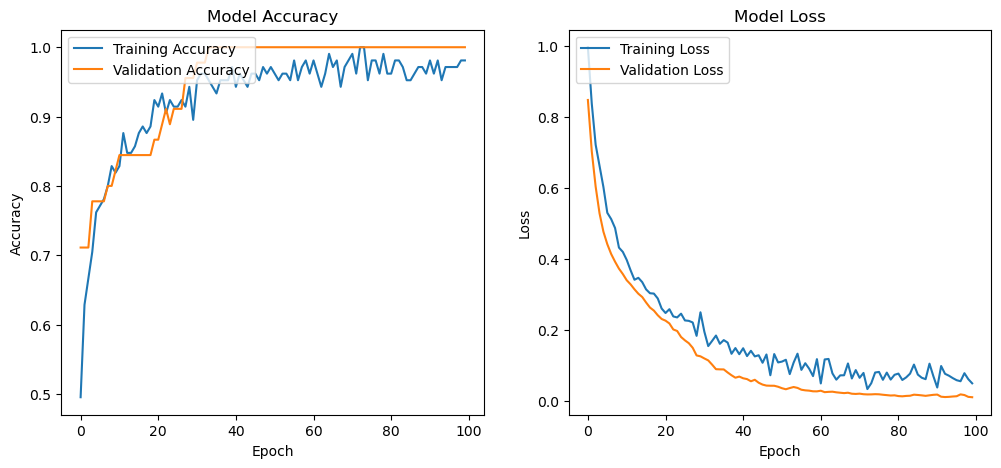

In [9]:
import matplotlib.pyplot as plt

# Plotting the accuracy of the model during training
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plotting the loss of the model during training
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()